In [159]:
# Import libraries
import numpy as np
import seaborn
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf

In [160]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.figure(figsize=(18, 6))  # 10 inches wide, 6 inches high
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    plt.show()
    return model.summary();

In [161]:
start = '2022-01-01'
end = '2023-01-01'
asset = yf.download(tickers='TSLA', start=start, end=end)['Close']
benchmark = yf.download(tickers='SPY', start=start, end=end)['Close']

# # We have to take the percent changes to get to returns
# # Get rid of the first (0th) element because it is NAN
r_asset = asset.pct_change()[1:]
r_benchmark = benchmark.pct_change()[1:]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


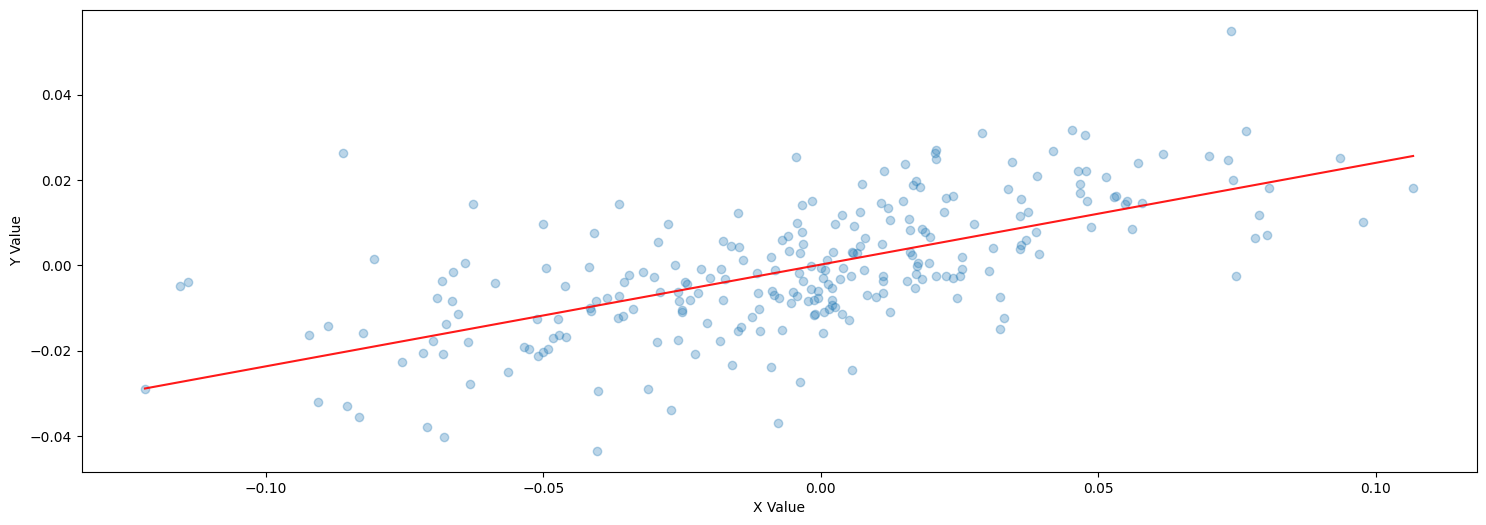

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     172.6
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           2.79e-30
Time:                        19:47:25   Log-Likelihood:                 756.57
No. Observations:                 250   AIC:                            -1509.
Df Residuals:                     248   BIC:                            -1502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.193      0.847      -0.001       0.002
x1             0.2384      0.018     13.138      0.000       0.203       0.274
==============================================================================
Omnibus:                        9.501   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               13.727
Skew:                           0.250   Prob(JB):                      0.00105
Kurtosis:                       4.033   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
linreg(r_asset.values, r_benchmark.values)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


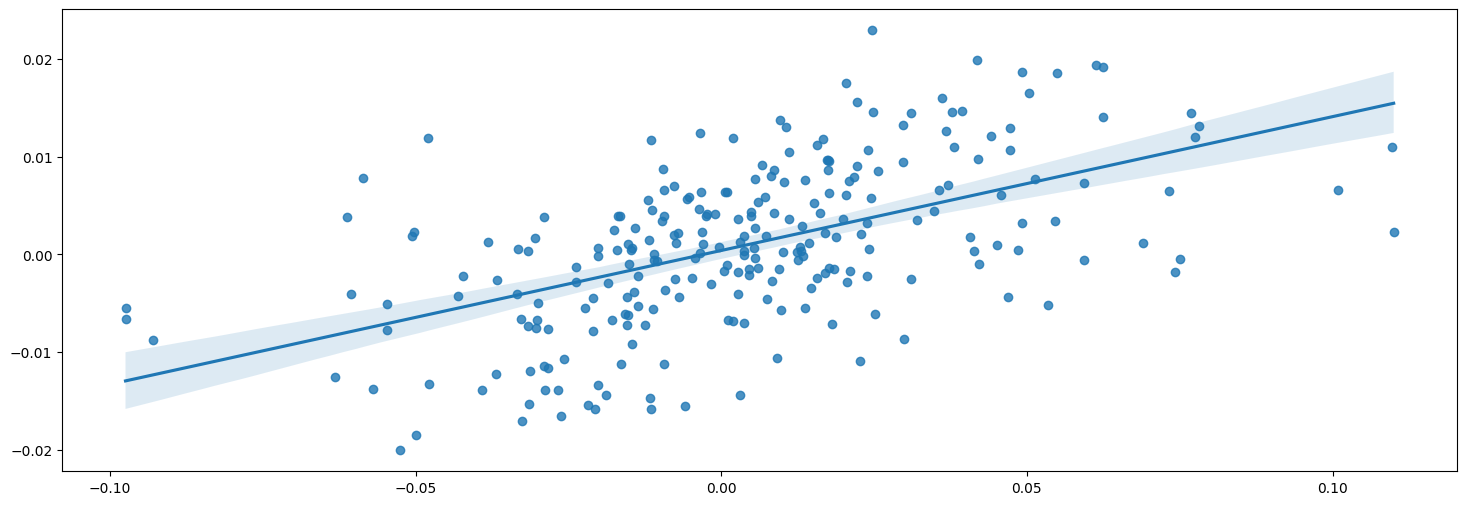

In [163]:
start = '2023-01-01'
end = '2024-01-01'
asset = yf.download(tickers='TSLA', start=start, end=end)['Close']
benchmark = yf.download(tickers='SPY', start=start, end=end)['Close']

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_asset = asset.pct_change()[1:]
r_benchmark = benchmark.pct_change()[1:]

plt.figure(figsize=(18, 6))
seaborn.regplot(x=r_asset.values, y=r_benchmark.values);
plt.show()